In [2]:
#import ....
import pandas as pd
import numpy as np
food =  pd.read_csv("food_nutrient_2011_13_AHS.csv", header=0,low_memory=False)

In [3]:
#Question 1
print("***")
print("Q1")
#Count number of rows which is number of foods.
count_row=food.shape[0]
#count number of columns which is number of attributes.
count_col=food.shape[1]
print("Number of foods:",count_row)
print("Number of attributes:",count_col)
#Print out datatype of food.
print(food.dtypes)
print("***")

***
Q1
Number of foods: 5740
Number of attributes: 57
Food ID                                                object
Survey ID                                               int64
Food Name                                              object
Survey flag                                            object
Energy, with dietary fibre (kJ)                         int64
Energy, without dietary fibre (kJ)                      int64
Moisture (g)                                          float64
Protein (g)                                           float64
Total fat (g)                                         float64
Available carbohydrates, with sugar alcohols (g)      float64
Available carbohydrates, without sugar alcohol (g)    float64
Starch (g)                                            float64
Total sugars (g)                                      float64
Added sugars (g)                                      float64
Free sugars (g)                                       float64
Dietary fibre (g

In [4]:
#Question 2
print("***")
print("Q2")
#Calculate median number of Magensium.
Ma_median = food["Magnesium (Mg) (mg)"].median()
#Calculate mean number of Moisture.
Mo_mean = food["Moisture (g)"].mean()
#Get the mean number which has one decimal place.
Mo_mean = round(Mo_mean,1)
print("Median value of Magnesium:",Ma_median)
print("Mean value of Moisture::",Mo_mean)
print("***")


***
Q2
Median value of Magnesium: 22.0
Mean value of Moisture:: 56.3
***


In [5]:
#Question 3

# Part a
#id is Survey id which has string type of virable.
id = food["Survey ID"].astype(str)

# Part b
#Using a for loop to get first two digits of every survey id and
#put into cate. Let food category gets the values from cate.
cate = []
for i in id:
    cate.append(i[:2])
food["Food category"]=cate

# Part c
print("***")
print("Q3")
#Screen out the foods has food category number eqaul to 13.
cate_13=food[food["Food category"]=="13"]["Food category"].count()
#Get the percentage of foods has food category number eqaul to 13 with one decimal place.
percentage = (cate_13/count_row)
percentage = round(percentage,1)*100
print("% of foods which are Cereal based products and dishes (Food category 13) =",percentage)
print("***")

***
Q3
% of foods which are Cereal based products and dishes (Food category 13) = 20.0
***


In [6]:
#Question 4
#import parallel_coordiantes for Q7.
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
#for question 7
#find out total fat and protein of foods which have food category number equal 13.
data_fat = food[food["Food category"]=="13"]["Total fat (g)"]
data_pro = food[food["Food category"]=="13"]["Protein (g)"]
data = [data_fat,data_pro]
#Plot box diagram with total fat and protein.
plt.boxplot(data,labels =["Total fat (g)","Protein (g)"])
plt.ylabel("gram")
plt.title("Distribution of Total fat (g) and Protein (g) within foods that are ”Cereal based products and dishes”")
plt.show()

<Figure size 640x480 with 1 Axes>

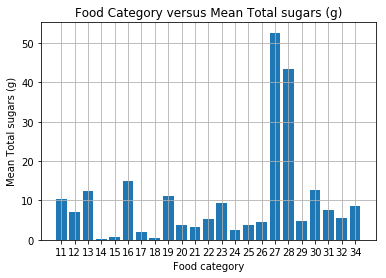

In [7]:
#Question 5
#Get the number of all food categories.
cat=food.groupby(["Food category"]).count()
num=cat.index
#Let x label values equal to the number of all food categories.
lst_food_cate=[]
for i in num:
    lst_food_cate.append(i)
x = lst_food_cate
#Let y value equal to the mean value of total sugar for every kind of food category.
mean_cate_sugar=[]
for j in lst_food_cate:
    v=food[food["Food category"]==j]["Total sugars (g)"].mean()
    mean_cate_sugar.append(v)
y = mean_cate_sugar
#Plot the bar diagram with x and y values.
plt.bar(x,y)
plt.xlabel("Food category")
plt.ylabel("Mean Total sugars (g)")
plt.title("Food Category versus Mean Total sugars (g)")
plt.grid(True)
plt.show()


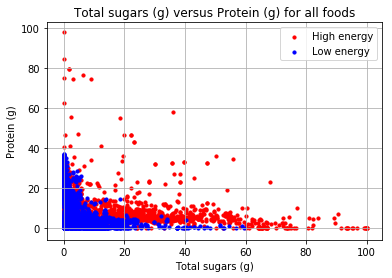

In [8]:
#Question 6

#Part a
#Set up a lst_fib to get the values of Energy, with dietary fibre.
fib = food["Energy, with dietary fibre (kJ)"]
#Using a for loop to distinguish high and low energylevel.
lst_fib=[]
for i in fib:
    if i > 1000:
        lst_fib.append(1)
    else:
        lst_fib.append(0)
food["EnergyLevel"] = lst_fib

#Part b
lst_sug=[]
lst_pro=[]
lst_ener=[]
lst_sug1=[]
lst_sug0=[]
lst_pro1=[]
lst_pro0=[]
#Get values of two kinds of food nutrients.
for i in food["Total sugars (g)"]:
    lst_sug.append(i)
for i in food["Protein (g)"]:
    lst_pro.append(i)
for i in food["EnergyLevel"]:
    lst_ener.append(i)

#Screen out two kinds of food nutrients with high and low energy.
for i in range (len(lst_ener)):
    if lst_ener[i]==1:
        lst_sug1.append(lst_sug[i])
        lst_pro1.append(lst_pro[i])
    else:
        lst_sug0.append(lst_sug[i])
        lst_pro0.append(lst_pro[i])
#Let x and y labels get the values 
x_aix1 = lst_sug1
y_aix1 = lst_pro1
x_aix0 = lst_sug0
y_aix0 = lst_pro0
#Plot scateer plot with total sugar and protein with high energy level in red and
#Low energy level in blue.
plt.scatter(x_aix1,y_aix1,c='r',s =10,label ="High energy")
plt.scatter(x_aix0,y_aix0,c='b',s =10,label ="Low energy")
plt.legend()
plt.grid(True)
plt.xlabel("Total sugars (g)")
plt.ylabel("Protein (g)")
plt.title("Total sugars (g) versus Protein (g) for all foods")
plt.show()


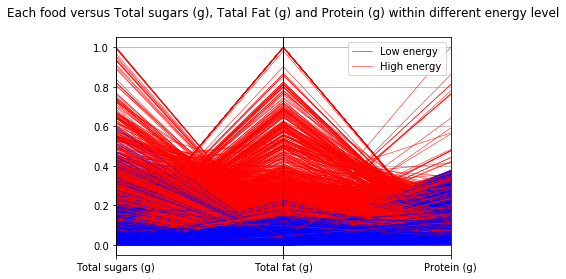

In [9]:
#Question 7

#Part a
#Find out maximun and minimun value of fat, sugar and protein.
fat_max=food["Total fat (g)"].max()
fat_min=food["Total fat (g)"].min()
sug_max=food["Total sugars (g)"].max()
sug_min=food["Total sugars (g)"].min()
pro_max=food["Protein (g)"].max()
pro_min=food["Protein (g)"].min()

lst_fat=[]
#Calculate the newvalue for fat, sugar and protein.
nvalue_fat=[]
nvalue_sug=[]
nvalue_pro=[]
for i in food["Total fat (g)"]:
    lst_fat.append(i)
for i in range (len(lst_fat)):
    number1 = (lst_fat[i]-fat_min)/(fat_max-fat_min)
    nvalue_fat.append(number1)
food["Total fat (g)"]=nvalue_fat

for i in range (len(lst_sug)):
    number2 = (lst_sug[i]-sug_min)/(sug_max-sug_min)
    nvalue_sug.append(number2)
food["Total sugars (g)"]=nvalue_sug

for i in range (len(lst_pro)):
    number3 = (lst_pro[i]-pro_min)/(pro_max-pro_min)
    nvalue_pro.append(number3)
food["Protein (g)"]=nvalue_pro

#Part b
#Plot the parallel coordinates diagram which import at Q4 already.
plt.title('Each food versus Total sugars (g), Tatal Fat (g) and Protein (g) within different energy level\n')
parallel_coordinates(food[["Total sugars (g)", "Total fat (g)", "Protein (g)",'EnergyLevel']],'EnergyLevel',color=["b","r"],linewidth=0.5)
plt.legend(['Low energy', 'High energy'])
plt.show()


***
Q8


                                           Food Name  calorie count per 100g
1                                     Dripping, beef                   900.8
2                    Fat, solid, vegetable oil based                   900.8
3  Shortening, commercial, animal fat (for short ...                   900.8
4                                               Lard                   900.8
5                             Ghee, clarified butter                   900.3
***


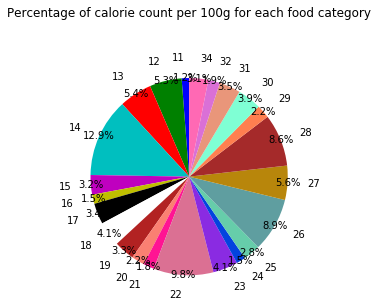

In [10]:
#Question 8


#Part a
#Get the value of Available carbohydrates, with sugar alcohols and alcohols.
#Using numbers to calculate calorie count per 100g.
lst_count=[]
lst_car=[]
lst_alc=[]
for i in food["Available carbohydrates, with sugar alcohols (g)"]:
    lst_car.append(i)
for i in food["Alcohol (g)"]:
    lst_alc.append(i)
for i in range (len(lst_alc)):
    digital=(4*lst_pro[i])+(4*lst_car[i])+(9*lst_fat[i])+(7*lst_alc[i])
    lst_count.append(digital)
food["calorie count per 100g"]=lst_count

#Part b
#Sreen out values of food name and calorie as top_car
top_car=food.filter(['Food Name','calorie count per 100g'])
#Get the values of calorie count per 100g within 1 decimal place.
top_car["calorie count per 100g"]=round(top_car["calorie count per 100g"],1)
#Sort the values with ascending equal to false.
top_car=top_car.sort_values(by=['calorie count per 100g'],ascending = False)
top_car=top_car.reset_index()
#Find the top 5 calorie food using ascending=False.
top_car=top_car.drop(columns='index')
top_5=pd.DataFrame(top_car.head(5))
#reset index as 1 2 3 4 5.
top_5=top_5.set_index(pd.Index([1,2,3,4,5]))
print("***")
print("Q8")
print("\n")
print(top_5)
print("***")

#Part c
#Calculate the mean calorie count per 100g for each food category.
cate_cal=food[['calorie count per 100g','Food category']].groupby(by='Food category').mean()
#Find out the label values.
cal_index=list(cate_cal.index)
df_cate_cal=pd.DataFrame(cate_cal)
colors=['b','g','r','c','m','y','k','w','#B22222','#FA8072','#FF1493','#DB7093','#8A2BE2','#0343DF',
       '#66CDAA','#5F9EA0','#B8860B','#A52A2A','#FF7F50','#7FFFD4','#E9967A','#DA70D6','#FF69B4']
#Plot the pie diagram.
plt.title('Percentage of calorie count per 100g for each food category\n\n\n')
plt.pie(cate_cal,labels=cal_index,labeldistance =1.2, autopct='%1.1f%%', pctdistance=1.0, colors=colors, startangle=90)
plt.axis('equal')
plt.show()

In [11]:
#Question 9
#Input new csv file.
aus =  pd.read_csv("8i. Australian Health Survey Classification System.csv", header=0,low_memory=False)
#Part a
#Change the food group code to string type.
code=aus["Food Group Code"].astype(str)
#Get the values of food code and food group.
lst_food_code = []
lst_food_group =[]
for i in code:
    lst_food_code.append(i)
for i in aus["Food Group and Sub-Group Name"]:
    lst_food_group.append(i)
#Set up a dictionary to store food code which eqaual to 
#food category and foode group.
dic_food={}
for i in range (len(lst_food_code)):
    for j in lst_food_cate:
         if lst_food_code[i] == j:
            dic_food[j]=lst_food_group[i]
#Put the food category into food.
lst_cate_name=[]
for i in cate:
    for k,v in dic_food.items():
        if i ==k:
            lst_cate_name.append(v)
food['Food category name']=lst_cate_name
        
#Part b
import json
print('{')
print('\"'"Mean total sugars (g) by category"'\":')
lst_food_value=[]
for i in dic_food.values():
    lst_food_value.append(i)
dic_sugar={}
#Get values of food group name from dic_food.values
#Get values of mean sugar from Q5 which is mean_cate_sugar.
for i in range (len(lst_food_value)):
    dic_sugar[lst_food_value[i]]=round(mean_cate_sugar[i],1)
#Convert dict to json format and print it out.
print(json.dumps(dic_sugar, ensure_ascii=False))
print('}')
    

{
"Mean total sugars (g) by category":
{"Non-alcoholic beverages": 10.4, "Cereals and cereal products": 7.1, "Cereal based products and dishes": 12.5, "Fats and oils": 0.1, "Fish and seafood products and dishes": 0.8, "Fruit products and dishes": 14.9, "Egg products and dishes": 1.9, "Meat, poultry and game products and dishes ": 0.5, "Milk products and dishes": 11.1, "Dairy & meat substitutes": 3.7, "Soup": 3.2, "Seed and nut products and dishes": 5.4, "Savoury sauces and condiments": 9.5, "Vegetable products and dishes": 2.5, "Legume and pulse products and dishes": 3.7, "Snack foods": 4.5, "Sugar products and dishes": 52.6, "Confectionery and cereal/nut/fruit/seed bars": 43.5, "Alcoholic beverages": 4.9, "Special dietary foods": 12.5, "Miscellaneous": 7.6, "Infant formulae and foods": 5.6, "Reptiles, amphibia and insects": 8.7}
}
